In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('netflix-shows/netflix_titles.csv')
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [3]:
print("Columns  : " , data.shape[1])
print("\nFeatures : \n" , data.columns.tolist())
print("\nMissing values :  ", data.isnull().sum())
print("\nUnique values :  \n", data.nunique())
print("\nInfo : \n") 
print(data.info())

Columns  :  12

Features : 
 ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']

Missing values :   show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

Unique values :  
 show_id         6234
type               2
title           6172
director        3301
cast            5469
country          554
date_added      1524
release_year      72
rating            14
duration         201
listed_in        461
description     6226
dtype: int64

Info : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
show_id         6234 non-null int64
type            6234 non-null object
title           6234 non-null object
director        4265 non-null obje

In [4]:
data.describe()

,show_id,release_year
count,6.234000e+03,6234.00000
mean,7.670368e+07,2013.35932
std,1.094296e+07,8.81162
min,2.477470e+05,1925.00000
25%,8.003580e+07,2013.00000
50%,8.016337e+07,2016.00000
75%,8.024489e+07,2018.00000
max,8.123573e+07,2020.00000


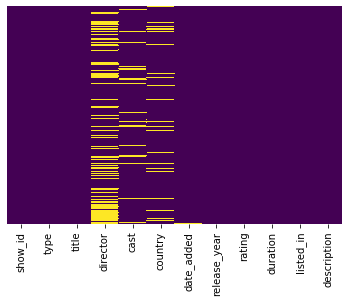

In [34]:
ax = sns.heatmap(data.isnull(), yticklabels=False, cmap = 'viridis', cbar = False)

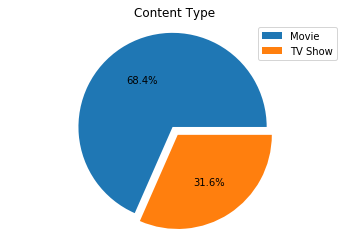

In [6]:
group_type = data['type'].value_counts()
plt.pie(group_type, explode = [0.1, 0], autopct='%1.1f%%')
plt.axis('equal')
plt.title("Content Type")
plt.legend(group_type.index)
plt.show()

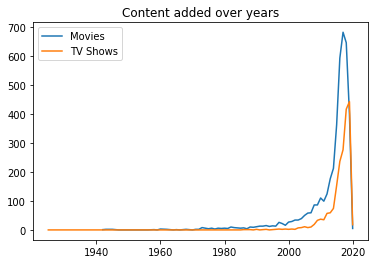

In [7]:
Movies = data[data['type'] == 'Movie']
TvShows = data[data['type'] == 'TV Show']

movie_counts = Movies['release_year'].value_counts().reset_index()
movie_counts = movie_counts.rename(columns = {'index':'release_year', 'release_year':'count'})
movie_counts = movie_counts.sort_values('release_year')
plt.plot(movie_counts['release_year'], movie_counts['count'])

tvshows_counts = TvShows['release_year'].value_counts().reset_index()
tvshows_counts = tvshows_counts.rename(columns = {'index':'release_year', 'release_year':'count'})
tvshows_counts = tvshows_counts.sort_values('release_year')
plt.plot(tvshows_counts['release_year'], tvshows_counts['count'])

plt.title('Content added over years')
plt.legend(['Movies', 'TV Shows', 'Total'])
plt.show()

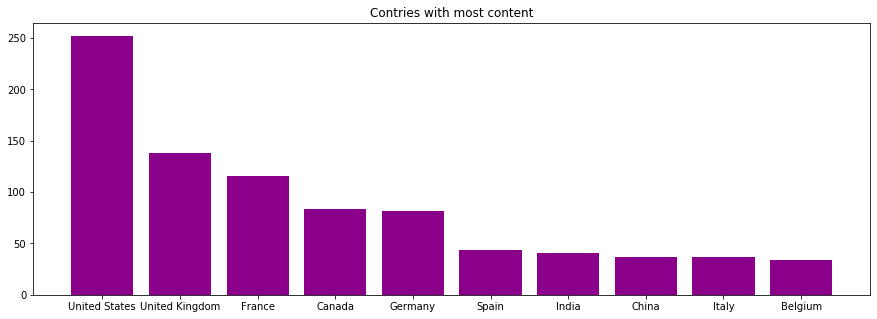

In [11]:
countries = data['country'].value_counts().reset_index()
countries = countries.rename(columns = {'index':'country', 'country':'count'})
country_count = {}
for i in countries.country:
    country_list = i.split(',')
    for j in country_list:
        if j == '':
            continue
        j = j.strip()
        if j not in country_count:
            country_count[j] = 1
        else:
            country_count[j] = country_count[j] + 1

countries_count = pd.DataFrame(country_count.items(), columns = ['country', 'count']).sort_values('count', ascending = False)
countries_list = countries_count[:10]
plt.bar(countries_list['country'], countries_list['count'], color='darkmagenta')
plt.title('Contries with most content')
plt.gcf().set_size_inches(15, 5, forward=True)
plt.show()

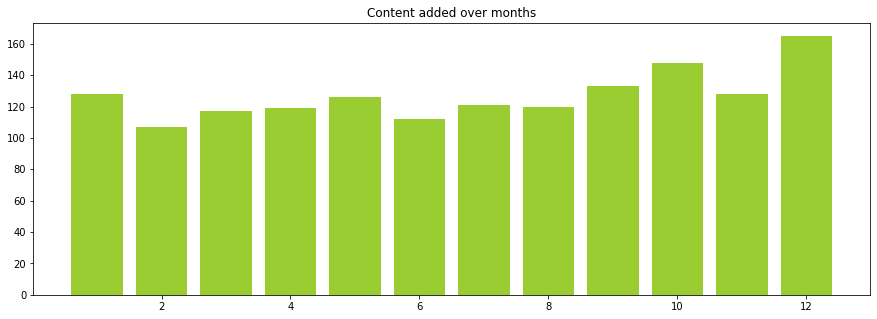

In [9]:
months = data['date_added'].value_counts().reset_index()
months = months.rename(columns={'index':'date_added', 'date_added':'count'})
content_added = {}
for i in months.date_added:
    lis = i.split()
    month = lis[0]
    if month not in content_added:
        content_added[month] = 1
    else:
        content_added[month] += 1
content_added = pd.DataFrame(content_added.items(), columns=['month', 'count'])
content_added['month'] = content_added['month'].replace({'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7,
                                                'August':8, 'September':9, 'October':10, 'November':11, 'December':12})
content_added = content_added.sort_values('month')
plt.bar(content_added['month'], content_added['count'], color = 'yellowgreen')
plt.title('Content added over months')
plt.gcf().set_size_inches(15, 5, forward=True)
plt.show()

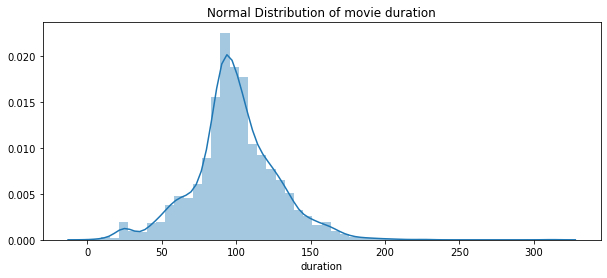

In [49]:
movies_list = data[data['type'] == 'Movie']
movie_duration = []
for i in movies_list['duration']:
    movie_duration.append(int(i[:-4]))
movie_duration = pd.Series(movie_duration, name = "duration")
sns.distplot(movie_duration).set_title('Normal Distribution of movie duration')
plt.gcf().set_size_inches(10, 4, forward=True)
plt.show()

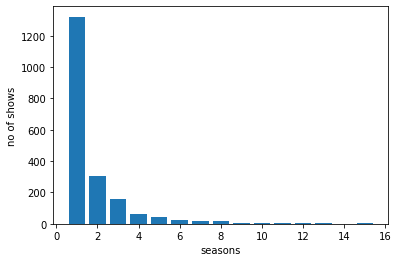

In [67]:
TvShows = data[data['type'] == 'TV Show']
seasons = []
for i in TvShows['duration']:
    seasons.append(int(i[:-7]))
seasons = pd.Series(seasons, name = "seasons")
seasons = seasons.value_counts().reset_index()
seasons = seasons.rename(columns={'index':'seasons', 'seasons':'count'})
plt.bar(seasons['seasons'], seasons['count'])
plt.xlabel('seasons')
plt.ylabel('no of shows')
plt.show()